Coupling of mean and variance estimate

$$
\frac{d}{d\tau}\big[\begin{array}{c}
w\\
b
\end{array}\big]=-2\eta\bigg(\big[\begin{array}{cc}
\mu^{2}+\sigma^{2}+\lambda\  & \ \mu\\
\mu\  & \ 1
\end{array}\big]\ \big[\begin{array}{c}
w\\
b
\end{array}\big]-\big[\begin{array}{c}
\lambda+\mu^{2}\\
\mu
\end{array}\big]\bigg)

$$

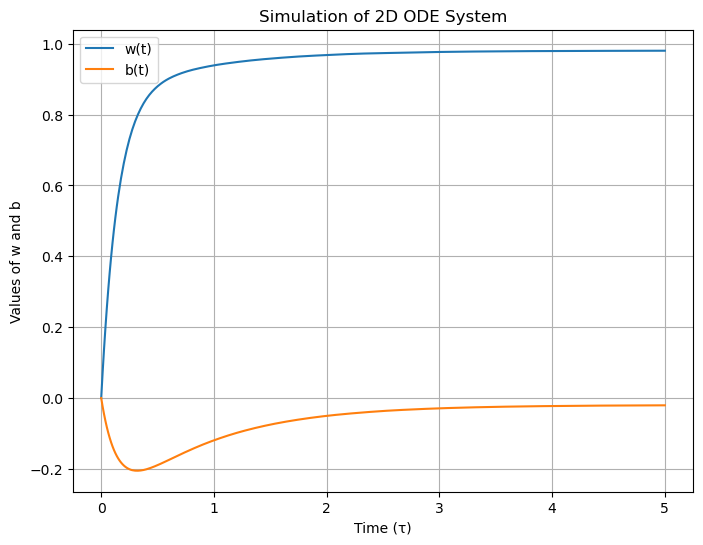

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
mu = -1.0  # example value for mu
sigma = 0.2  # example value for sigma
lambda_ = 2.0  # example value for lambda
eta = 1.0  # example value for eta

# Define the ODE system
def ode_system(t, y):
    w, b = y
    A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                  [mu, 1]])
    B = np.array([lambda_ + mu**2, mu])
    dydt = -2 * eta * (A @ np.array([w, b]) - B)
    return dydt

# Initial conditions
y0 = [0, 0]  # starting values for w and b

# Time span for the simulation
t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 400)

# Solve the ODE system
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='w(t)')
plt.plot(sol.t, sol.y[1], label='b(t)')
plt.xlabel('Time (τ)')
plt.ylabel('Values of w and b')
plt.title('Simulation of 2D ODE System')
plt.legend()
plt.grid(True)
plt.show()

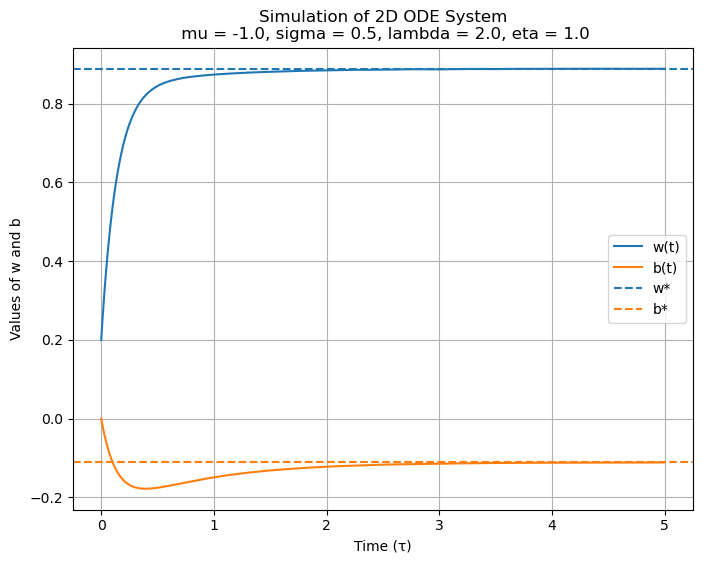

In [27]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def simulate_ode(mu, sigma, lambda_, eta, y0, t_span=(0, 5), pnts=400):
    # Define the ODE system
    def ode_system(t, y):
        w, b = y
        A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                      [mu, 1]])
        B = np.array([lambda_ + mu**2, mu])
        dydt = -2 * eta * (A @ np.array([w, b]) - B)
        return dydt
    t_eval = np.linspace(t_span[0], t_span[1], pnts)
    # Solve the ODE system
    sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
    w_star = lambda_ / (lambda_ + sigma**2)
    b_star = (1 - w_star) * mu
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(sol.t, sol.y[0], label='w(t)')
    plt.plot(sol.t, sol.y[1], label='b(t)')
    plt.axhline(y=w_star, color='C0', linestyle='--', label='w*')
    plt.axhline(y=b_star, color='C1', linestyle='--', label='b*')
    plt.xlabel('Time (τ)')
    plt.ylabel('Values of w and b')
    plt.title('Simulation of 2D ODE System\n mu = {}, sigma = {}, lambda = {}, eta = {}'.format(mu, sigma, lambda_, eta))
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
mu = -1.0
sigma = 0.2
lambda_ = 2.0
eta = 1.0
y0 = [1, 0]
t_span = [0, 5]

simulate_ode(mu = -1.0, sigma = 0.5, lambda_ = 2.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

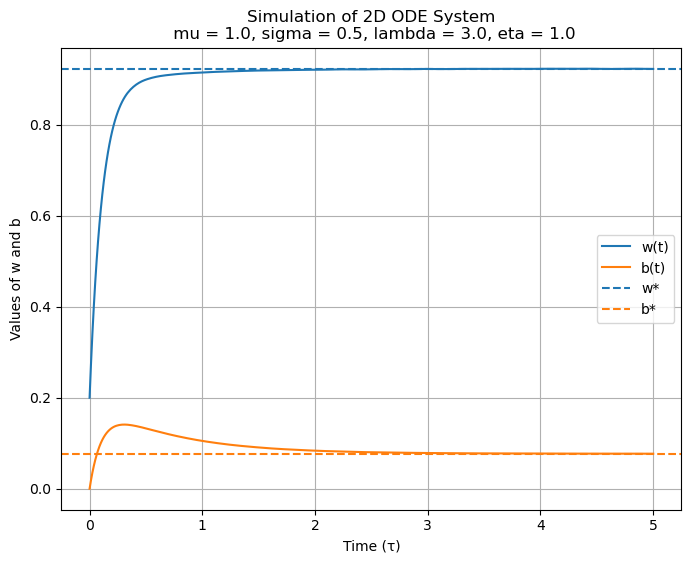

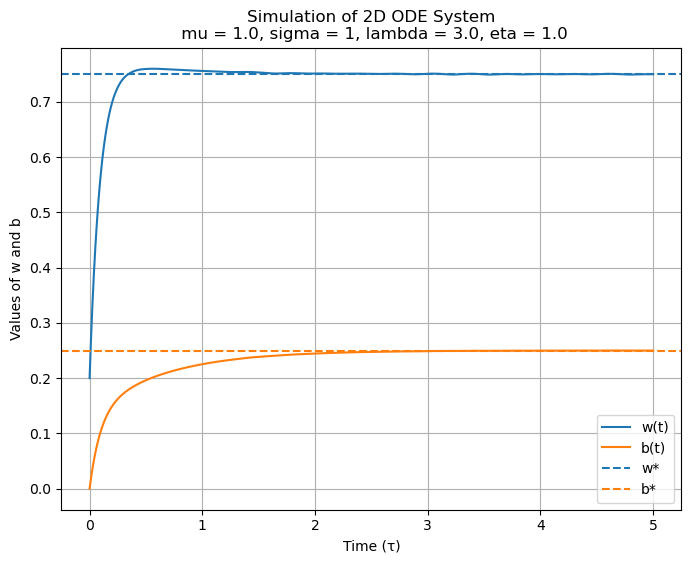

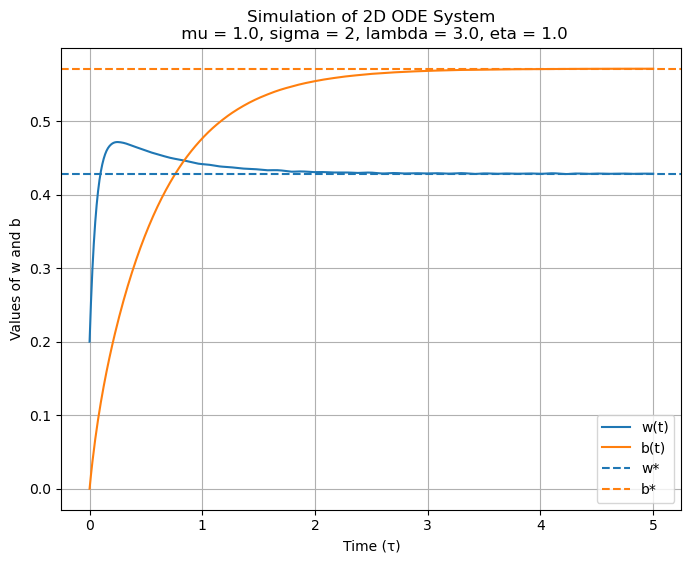

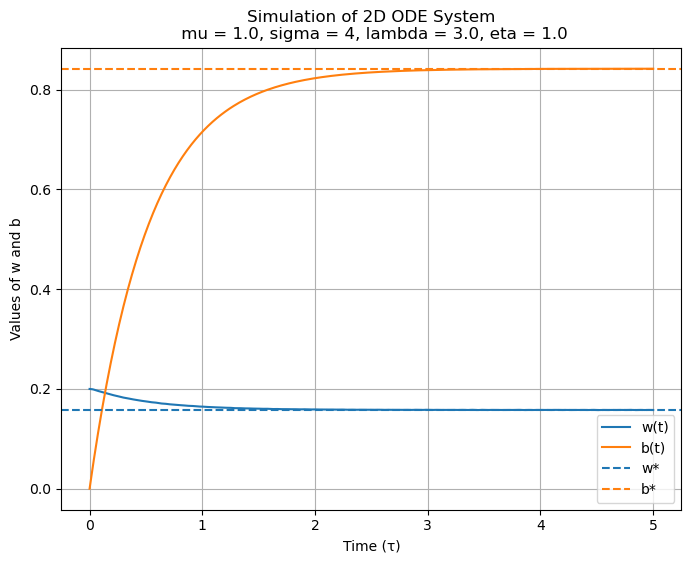

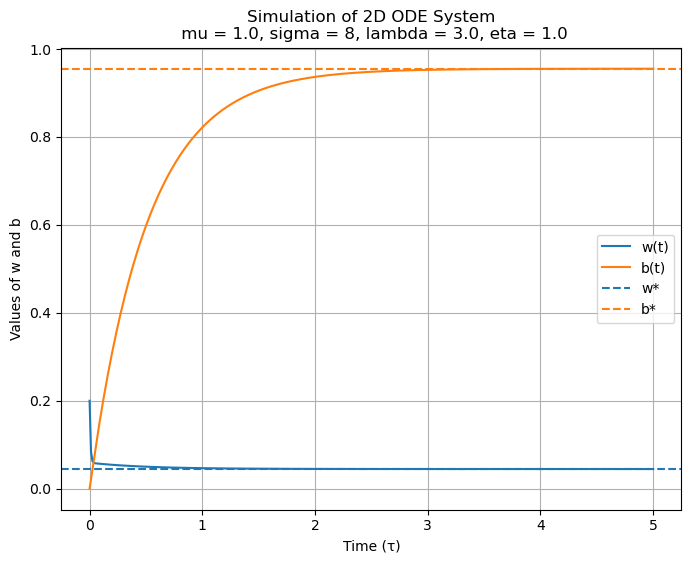

In [28]:
simulate_ode(mu = 1.0, sigma = 0.5, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 2, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 4, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 8, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])